In [334]:
import csv
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

In [379]:
def bar_chart_sur_notsur(set):
    sns.countplot(set['Survived'])

def bar_chart(set, feature):
    survived = set[set['Survived']==1][feature].value_counts()
    notsurvived = set[set['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived,notsurvived])
    df.index = ['Survived','Not Survived']
    df.plot(kind = 'bar',stacked=True,figsize=(9,5))

def expand_model(df):
    df["Title"] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
    df["Title"] = df["Title"].astype('category')

    df["Family_size"] = df['Parch'] + df['SibSp']

In [380]:
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

expand_model(train)
expand_model(test)

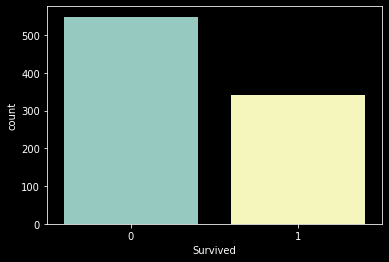

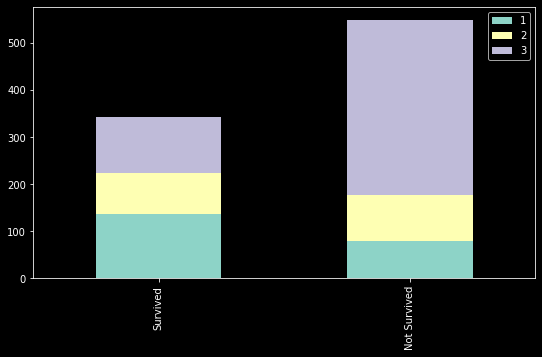

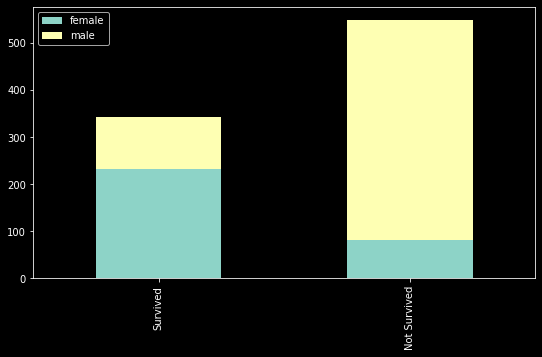

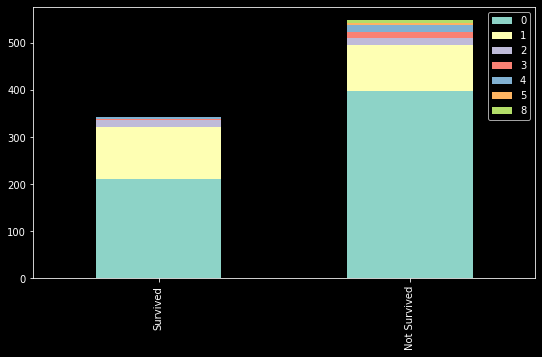

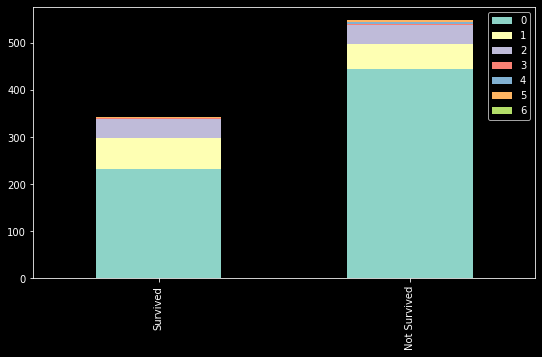

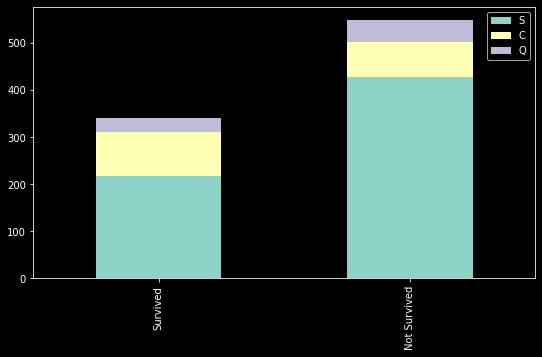

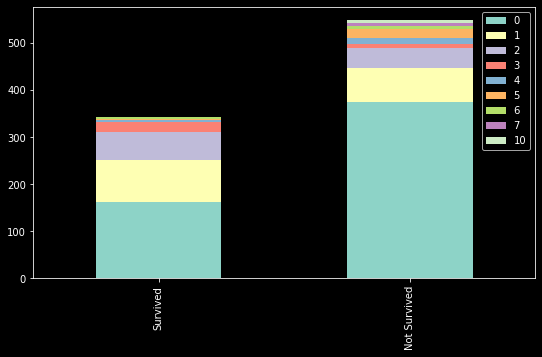

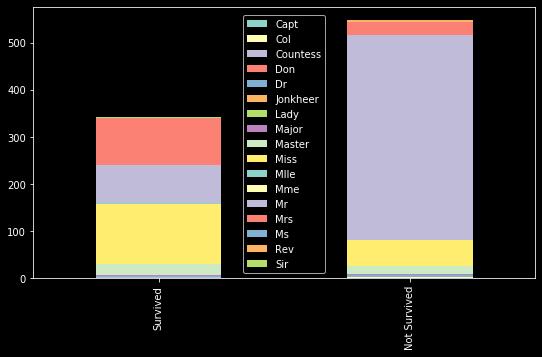

In [381]:
bar_chart_sur_notsur(train)
bar_chart(train, 'Pclass')
bar_chart(train, 'Sex')
bar_chart(train, 'SibSp')
bar_chart(train, 'Parch')
bar_chart(train, 'Embarked')
bar_chart(train, 'Family_size')
bar_chart(train, 'Title')


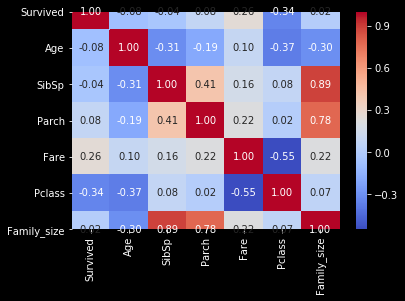

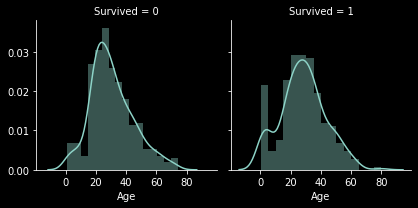

In [382]:
C_matrix = sns.heatmap(train[['Survived', 'Age', 'SibSp',
       'Parch',  'Fare', 'Pclass', 'Title', 'Family_size']].corr(),
                       annot=True,fmt='.2f',cmap ='coolwarm')

age_sur = sns.FacetGrid(train, col = 'Survived')
age_sur = age_sur.map(sns.distplot,'Age')

In [353]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [369]:

def prepare_data(df):
    train_data = pd.DataFrame()
    df["Sex"] = df["Sex"].astype('category')
    #obj_df["Embarked"] = obj_df["Embarked"].astype('category')

    m = df['Age'].median()
    train_data['Age'] = df['Age'].fillna(m)
    train_data["Age"] = train_data["Age"] / 100

    train_data["Sex"] = np.where(df["Sex"]=='male', 1, 0)

    train_data["Pclass1"] = np.where(df["Pclass"]==1, 1, 0)
    train_data["Pclass2"] = np.where(df["Pclass"]==2, 1, 0)
    train_data["Pclass3"] = np.where(df["Pclass"]==3, 1, 0)

    train_data["Embarked_S"] = np.where(df["Embarked"]=='S', 1, 0)
    train_data["Embarked_C"] = np.where(df["Embarked"]=='C', 1, 0)
    train_data["Embarked_Q"] = np.where(df["Embarked"]=='Q', 1, 0)
    
    train_data["Titles"] = df["Title"].cat.codes
    
    train_labels = df['Survived']

#    return (obj_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']], obj_df['Survived'])
#    return (train_data.to_numpy(), train_labels.to_numpy())
    return (train_data, train_labels)

def prepare_test_data(obj_df):
    obj_df["Sex"] = obj_df["Sex"].astype('category')
    obj_df["Embarked"] = obj_df["Embarked"].astype('category')

    obj_df["Sex_cat"] = obj_df["Sex"]
    obj_df["Embarked_cat"] = obj_df["Embarked"]

    obj_df["Sex"] = obj_df["Sex"].cat.codes
    obj_df["Embarked"] = obj_df["Embarked"].cat.codes

    obj_df["Age_old"] = obj_df["Age"]
    obj_df["Age"] = obj_df["Age"] / 100
    
#    return (obj_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])
    return (obj_df[['Age', 'Pclass']])


In [370]:
(train_data, train_labels) = prepare_data(train.copy())
train_data.head(20)

,Age,Sex,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_C,Embarked_Q,Titles
0,0.22,1,0,0,1,1,0,0,12
1,0.38,0,1,0,0,0,1,0,13
2,0.26,0,0,0,1,1,0,0,9
3,0.35,0,1,0,0,1,0,0,13
4,0.35,1,0,0,1,1,0,0,12
5,0.28,1,0,0,1,0,0,1,12
6,0.54,1,1,0,0,1,0,0,12
7,0.02,1,0,0,1,1,0,0,8
8,0.27,0,0,0,1,1,0,0,13
9,0.14,0,0,1,0,0,1,0,13


In [341]:
act = 'relu'
model = tf.keras.models.Sequential([keras.layers.Dense(8, input_dim=train_data.shape[1], 
activation=act, kernel_initializer='he_uniform'), 
                                    keras.layers.Dense(16, activation=act),
                                    keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

============================] - 0s 104us/sample - loss: 0.4551 - accuracy: 0.7890 - val_loss: 0.4650 - val_accuracy: 0.7667
Epoch 17/150
801/801 [==============================] - 0s 104us/sample - loss: 0.4555 - accuracy: 0.7890 - val_loss: 0.4630 - val_accuracy: 0.7667
Epoch 18/150
801/801 [==============================] - 0s 100us/sample - loss: 0.4535 - accuracy: 0.7865 - val_loss: 0.4604 - val_accuracy: 0.7667
Epoch 19/150
801/801 [==============================] - 0s 105us/sample - loss: 0.4527 - accuracy: 0.7853 - val_loss: 0.4589 - val_accuracy: 0.7889
Epoch 20/150
801/801 [==============================] - 0s 104us/sample - loss: 0.4524 - accuracy: 0.7903 - val_loss: 0.4588 - val_accuracy: 0.7667
Epoch 21/150
801/801 [==============================] - 0s 101us/sample - loss: 0.4506 - accuracy: 0.7890 - val_loss: 0.4579 - val_accuracy: 0.7667
Epoch 22/150
801/801 [==============================] - 0s 101us/sample - loss: 0.4500 - accuracy: 0.7890 - val_loss: 0.4573 - val_accur

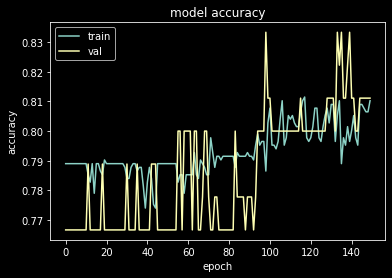

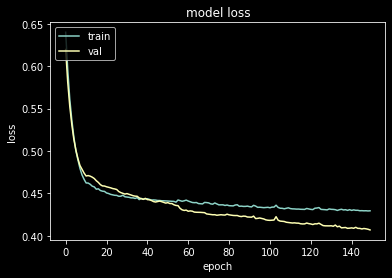

In [342]:
history = model.fit(train_data.to_numpy(), train_labels, batch_size=32, validation_split=0.2, epochs=75)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()